In [1]:
#include "ROOT/RDataFrame.hxx"
#include "ROOT/RDF/RInterface.hxx"
#include "TFile.h"
#include "TTree.h"
#include "TMath.h"
#include <vector>

#include <TTreeReader.h>
#include <TTreeReaderValue.h>
#include <TTreeReaderArray.h>

#include <TAttImage.h>

using namespace ROOT; // RDataFrame lives in here
using namespace std;

In [2]:
std::vector<TString> filenames = { 
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin0.root",
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin1.root",
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin2.root",
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin3.root",
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin4.root",
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin5.root",
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin6.root",
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin7.root",
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin8.root",
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin9.root",
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin10.root",
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin11.root",
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin12.root",
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin13.root",
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin14.root",
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin15.root",
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin16.root",
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin17.root",
      "/home/tmengel/jet-background-subtraction/data/jet-trees-raw/200GeV_R02_0to10cent_ptbin18.root"};
      
auto jetTree = "JetTree";
auto ktTree = "KTJetTree";
auto eventTree = "eventInfo";

In [14]:
// Enable multi-threading
ROOT::EnableImplicitMT();

Float_t median_pt_over_area, median_npart_over_area, fastjet_rho, event_average_pt, event_median_pt;
Float_t jetpt, jeteta, jetphi, jetpt_pythia, jetarea;
Float_t track0pt, track1pt, track2pt, track3pt, track4pt, average_track_pt, median_track_pt, jetangularity, trackptvariance,trackptskewness,trackptkurtosis;
std::vector<Float_t> pToverNpart;
Int_t jetnparts;
Float_t jetpt_pythia_fraction, AreaBased, NumberBased, weight;
Float_t NormPt, deltaPhi, deltaEta;
Int_t ptbin;
Float_t scaledweight,eventxsec;
Int_t pictureIndex = 0;

TFile* fout = new TFile("JETIMAGES.root","RECREATE");
TTree* outTree= new TTree("outTree","outTree");

outTree->Branch("scaledweight", &scaledweight, "scaledweight/F");
outTree->Branch("median_pt_over_area", &median_pt_over_area, "median_pt_over_area/F");
outTree->Branch("median_npart_over_area", &median_npart_over_area, "median_npart_over_area/F" );

outTree->Branch("event_average_pt", &event_average_pt, "event_average_pt/F" );
outTree->Branch("event_median_pt", &event_median_pt, "event_median_pt/F" );
outTree->Branch("jetpt", &jetpt, "jetpt/F");
outTree->Branch("jeteta", &jeteta, "jeteta/F");
outTree->Branch("jetphi", &jetphi, "jetphi/F");
outTree->Branch("jetpt_pythia", &jetpt_pythia, "jetpt_pythia/F");
outTree->Branch("AreaBased", &AreaBased, "AreaBased/F");
outTree->Branch("NumberBased", &NumberBased, "NumberBased/F");

outTree->Branch("jetarea", &jetarea, "jetarea/F");
outTree->Branch("jetnparts", &jetnparts, "jetnparts/I" );

outTree->Branch("track0pt", &track0pt, "track0pt/F" );
outTree->Branch("track1pt", &track1pt, "track1pt/F" );
outTree->Branch("track2pt", &track2pt, "track2pt/F" );
outTree->Branch("average_track_pt", &average_track_pt, "average_track_pt/F");
outTree->Branch("median_track_pt", &median_track_pt, "median_track_pt/F");
outTree->Branch("jetangularity", &jetangularity, "jetangularity/F");
outTree->Branch("trackptvariance", &trackptvariance, "trackptvariance/F");
outTree->Branch("trackptskewness", &trackptskewness, "trackptskewness/F");
outTree->Branch("trackptkurtosis", &trackptkurtosis, "trackptkurtosis/F");


for(int i=0; i <19; i++){

    TString filename = filenames[i];
    TFile f(filename.Data());
    TTreeReader jettr(jetTree, &f);
    TTreeReader weighttr(eventTree, &f);
    TTreeReaderValue<Float_t> jet_weight(jettr, "weight");
    TTreeReaderValue<Float_t> median_pT_over_area(jettr, "rhoArea");
    TTreeReaderValue<Float_t> median_Npart_over_area(jettr, "rhoNpart");
    TTreeReaderValue<Float_t> fastjet_rho_estimate(jettr, "rhoEst");
    TTreeReaderValue<Float_t> event_average_pT(jettr, "EventAvgPt");
    TTreeReaderValue<Float_t> event_median_pT(jettr, "EventMedianPt");
    TTreeReaderValue<Float_t> jet_pT(jettr, "JetPt");
    TTreeReaderValue<Float_t> jet_eta(jettr, "JetEta");
    TTreeReaderValue<Float_t> jet_phi(jettr, "JetPhi");
    TTreeReaderValue<Float_t> jet_pT_from_pythia(jettr, "JetTruePt");
    TTreeReaderValue<Float_t> jet_area(jettr, "Area");
    TTreeReaderValue<Int_t> jet_Nparts(jettr, "nJetParts");
    TTreeReaderArray<Float_t> constituent_pT(jettr, "constituentPt");
    TTreeReaderArray<Float_t> constituent_eta(jettr, "constituentEta");
    TTreeReaderArray<Float_t> constituent_phi(jettr, "constituentPhi");
    TTreeReaderArray<Float_t> constituent_truth_index(jettr, "constituentTrueIndex");
    //Event Tree Varibles//
    TTreeReaderValue<Float_t> xsec_over_totalweight(weighttr, "xsec_over_eventweight");
    TTreeReaderValue<Int_t> event_pTbin(weighttr, "ptbinID");

    weighttr.Next(); 
    ptbin = *event_pTbin; 
    eventxsec = *xsec_over_totalweight;

    for(int j =0; j<1000; j++){

        jettr.Next();
        median_pt_over_area = *median_pT_over_area;

        weight = *jet_weight;
        scaledweight = weight*eventxsec;
        median_npart_over_area = *median_Npart_over_area;
        fastjet_rho = *fastjet_rho_estimate;
        event_average_pt = *event_average_pT;
        event_median_pt = *event_median_pT;
        jetpt = *jet_pT;
        jeteta = *jet_eta;
        jetphi = *jet_phi;
        jetpt_pythia = *jet_pT_from_pythia;
        jetarea = *jet_area;
        jetnparts = *jet_Nparts;
        AreaBased = jetpt - jetarea*median_pt_over_area;
        NumberBased = jetpt - median_npart_over_area*jetnparts;
        average_track_pt = jetpt/jetnparts;

        track0pt = constituent_pT[0];
        track1pt = constituent_pT[1];
        track2pt = constituent_pT[2];
        track3pt = constituent_pT[3];
        track4pt = constituent_pT[4];
        pToverNpart.clear();
        pToverNpart.resize(0);

        Float_t temp, pttemp;
        jetangularity =0;
        trackptvariance=0;
        trackptskewness=0;
        trackptkurtosis=0;
        pttemp =0;

        for (int i=0;i < constituent_pT.GetSize(); i++) {
            pToverNpart.push_back(constituent_pT[i]); 
            temp = (constituent_pT[i] - average_track_pt);
            jetangularity+= constituent_pT[i]*TMath::Sqrt( (jeteta-constituent_eta[i])*(jeteta-constituent_eta[i])+ (jetphi-constituent_phi[i])*(jetphi-constituent_phi[i]) );
            trackptvariance+= TMath::Power(temp,2.0);
            trackptskewness+= TMath::Power(temp,3.0);
            trackptkurtosis+= TMath::Power(temp,4.0);
            if(constituent_truth_index[i] == 1.0) pttemp +=  constituent_pT[i];
        }

        // sort(pToverNpart.begin(), pToverNpart.end());
        median_track_pt = pToverNpart[int(pToverNpart.size()/2)];
        jetpt_pythia_fraction = pttemp/jetpt;
        jetangularity = jetangularity/jetpt;
        trackptvariance = trackptvariance/jetnparts;
        trackptskewness = trackptskewness/jetnparts;
        trackptkurtosis = trackptkurtosis/jetnparts;

        if(TMath::Abs(jeteta) < 1.1 && jetpt > 5.0  && jetpt_pythia_fraction != 0 ){
            outTree->Fill();

            TH3F * jet3D = new TH3F("jetPicture","jetPicture",10,-1,1,10,-1,1,10,0,1);
            for (int i=0;i < constituent_pT.GetSize(); i++) {

                            NormPt = constituent_pT[i]/jetpt; 
                            deltaEta = (jeteta-constituent_eta[i])/TMath::Sqrt(jetarea);
                            deltaPhi = (jetphi-constituent_phi[i])/TMath::Sqrt(jetarea);
                            jet3D->Fill(deltaPhi,deltaEta,NormPt);
                            
            }

            TH2D* jetPicture=(TH2D*)jet3D->Project3D("xy colz");

            Float_t norm;
            for(Int_t ny = 0; ny < 10+1; ny++){
            norm = jetpt;
            if( norm ==0 ) continue;
            for(Int_t nx =0; nx< 10+1; nx++){
                jetPicture->SetBinContent(nx,ny,jetPicture->GetBinContent(nx,ny)/norm);
                jetPicture->SetBinError(nx,ny,jetPicture->GetBinError(nx,ny)/norm);
                }
            } 
            
            string imgPathAndName = "jetimages/"+std::to_string(pictureIndex) +".png";
            const char* imgPathAndNameConstCharPtr = imgPathAndName.c_str();
            gStyle->SetOptStat(0);
            gStyle->SetPalette(kBird);
            TImage *img = TImage::Create();
            img->SetImage((const Double_t *)jetPicture->GetArray(), jetPicture->GetNbinsX() + 2,jetPicture->GetNbinsY() + 2, gHistImagePalette);

            auto c1 = new TCanvas("c1","c1",400,400);
            c1->SetFillColor(0);
            c1->SetBorderMode(0);
            c1->SetBorderSize(0);
            c1->SetFrameFillColor(0);
            c1->SetFrameBorderMode(0);
            c1->SetTopMargin(0.0);
            c1->SetLeftMargin(0.0);
            c1->SetRightMargin(0.0);
            c1->SetBottomMargin(0.0);
            gStyle->SetCanvasBorderMode(0);

            img->SetConstRatio(0);
            img->Vectorize(256);
            img->Draw();
            //c1->Draw();
            TImage *png = TImage::Create();
            png->FromPad(c1);
            img->WriteImage(imgPathAndNameConstCharPtr);
            pictureIndex++;
        }


    }

}
fout->Write();
fout->Close();




IncrementalExecutor::executeFunction: symbol '_ZSt7forwardIRKfEOT_RNSt16remove_referenceIS2_E4typeE' unresolved while linking function '_GLOBAL__sub_I_cling_module_319'!
You are probably missing the definition of float const& std::forward<float const&>(std::remove_reference<float const&>::type&)
Maybe you need to load the corresponding shared library?
 Generating stack trace...
 0x00007fe93d51d985 in <unknown> from /home/tmengel/root/lib/libCling.so
 0x00007fe93d5207ad in <unknown> from /home/tmengel/root/lib/libCling.so
 0x00007fe93d520b84 in <unknown> from /home/tmengel/root/lib/libCling.so
 0x00007fe93d60cfd7 in <unknown> from /home/tmengel/root/lib/libCling.so
 0x00007fe93d41f5ac in <unknown> from /home/tmengel/root/lib/libCling.so
 0x00007fe93d436cb2 in TCling::ProcessLine(char const*, TInterpreter::EErrorCode*) + 0xe02 from /home/tmengel/root/lib/libCling.so
 0x00007fe93abbbc4f in JupyROOTExecutorImpl(char const*) + 0x3f from /home/tmengel/root/lib/libJupyROOT3_8.so
 0x00007fe93a

In [10]:
jettr.Next();

median_pt_over_area = *median_pT_over_area;
median_npart_over_area = *median_Npart_over_area;
fastjet_rho = *fastjet_rho_estimate;
event_average_pt = *event_average_pT;
event_median_pt = *event_median_pT;
jetpt = *jet_pT;
jeteta = *jet_eta;
jetphi = *jet_phi;
jetpt_pythia = *jet_pT_from_pythia;
jetarea = *jet_area;
jetnparts = *jet_Nparts;

TH3F * jet3D = new TH3F("jetPicture","jetPicture",10,-1,1,10,-1,1,10,0,1);
for (int i=0;i < constituent_pT.GetSize(); i++) {

                NormPt = constituent_pT[i]/jetpt; 
                deltaEta = (jeteta-constituent_eta[i])/TMath::Sqrt(jetarea);
                deltaPhi = (jetphi-constituent_phi[i])/TMath::Sqrt(jetarea);
                jet3D->Fill(deltaPhi,deltaEta,NormPt);
                
}

TH2D* jetPicture=(TH2D*)jet3D->Project3D("xy colz");

Float_t norm;
for(Int_t ny = 0; ny < 10+1; ny++){
norm = jetpt;
if( norm ==0 ) continue;
for(Int_t nx =0; nx< 10+1; nx++){
    jetPicture->SetBinContent(nx,ny,jetPicture->GetBinContent(nx,ny)/norm);
    jetPicture->SetBinError(nx,ny,jetPicture->GetBinError(nx,ny)/norm);
    }
} 


Warning in <TFile::Append>: Replacing existing TH1: jetPicture (Potential memory leak).


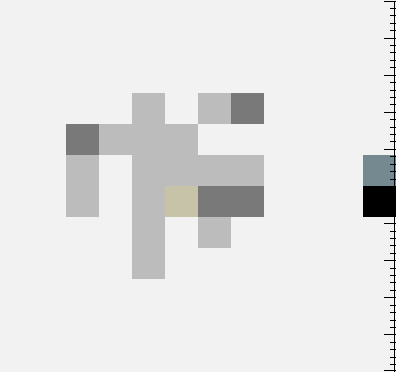

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
string graphName = "1";
string imgPathAndName = "jetimages/"+graphName+".png";
const char* imgPathAndNameConstCharPtr = imgPathAndName.c_str();
gStyle->SetOptStat(0);
gStyle->SetPalette(kBird);
TImage *img = TImage::Create();
img->SetImage((const Double_t *)jetPicture->GetArray(), jetPicture->GetNbinsX() + 2,jetPicture->GetNbinsY() + 2, gHistImagePalette);

auto c1 = new TCanvas("c1","c1",400,400);
c1->SetFillColor(0);
c1->SetBorderMode(0);
c1->SetBorderSize(0);
c1->SetFrameFillColor(0);
c1->SetFrameBorderMode(0);
c1->SetTopMargin(0.0);
c1->SetLeftMargin(0.0);
c1->SetRightMargin(0.0);
c1->SetBottomMargin(0.0);
gStyle->SetCanvasBorderMode(0);

img->SetConstRatio(0);
img->Vectorize(256);
img->Draw();
c1->Draw();
TImage *png = TImage::Create();
png->FromPad(c1);
img->WriteImage(imgPathAndNameConstCharPtr);

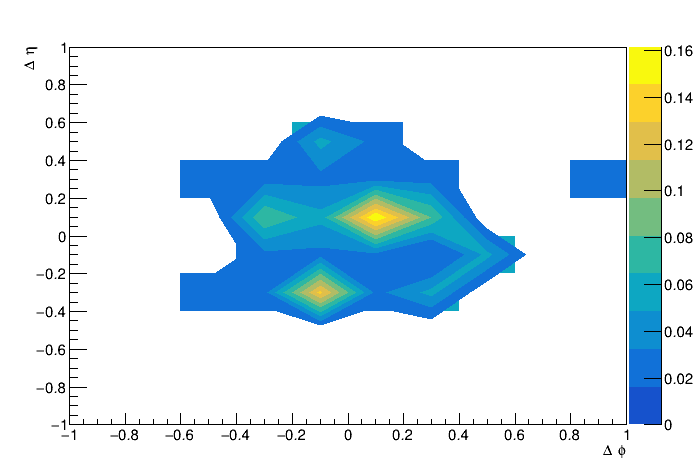

In [4]:

   auto c2 = new TCanvas();
        //jetPicture->Smooth();
        jetPicture->Draw("COLZ");
        jetPicture->SetTitle("");
        jetPicture->SetContour(10);
        jetPicture->Draw("CONT6 COLZ");
        // //jetPicture->SetLineColor(kOrange);
        // //jetPicture->SetFillColor(kRed);
        // //truejetPicture->Draw("samecolz");
        jetPicture->GetYaxis()->SetTitle("#Delta #eta");
        jetPicture->GetXaxis()->SetTitle("#Delta #phi");
        c2->Draw();
